## PCA

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [22]:
# データ取得
iris = load_iris()

# ndarrayからdfに変換
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
# 特徴量と目的変数を分離
X = df.loc[:, df.columns!='species']
y = df['species'].values

# 標準化
X = StandardScaler().fit_transform(X)

In [36]:
# PCAにより2次元変換
pca = PCA(n_components=2)
pca.fit(X)
X_pc = pca.transform(X)

In [50]:
# 2次元変換と目的変数のdf生成
# 配列から行列（n行1列）に変換
y = y.reshape(-1, 1)
df_pc = pd.DataFrame(np.concatenate([X_pc, y], axis=1), columns=['first_component', 'second_component', 'species']).astype({'first_component':float, 'second_component':float})
df_pc

,first_component,second_component,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica


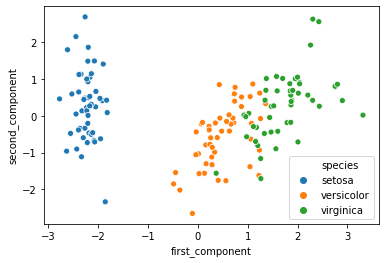

In [53]:
sns.scatterplot(x='first_component', y='second_component', hue='species', data=df_pc)

In [54]:
# PCAにより3次元変換
pca = PCA(n_components=3)
pca.fit(X)
X_pc = pca.transform(X)

In [57]:
# 2次元変換と目的変数のdf生成
# 配列から行列（n行1列）に変換
y = y.reshape(-1, 1)
df_pc = pd.DataFrame(np.concatenate([X_pc, y], axis=1), columns=['first_component', 'second_component', 'third_component', 'species']).astype({'first_component':float, 'second_component':float, 'third_component':float})
df_pc

,first_component,second_component,third_component,species
0,-2.264703,0.480027,-0.127706,setosa
1,-2.080961,-0.674134,-0.234609,setosa
2,-2.364229,-0.341908,0.044201,setosa
3,-2.299384,-0.597395,0.091290,setosa
4,-2.389842,0.646835,0.015738,setosa
...,...,...,...,...
145,1.870503,0.386966,0.256274,virginica
146,1.564580,-0.896687,-0.026371,virginica
147,1.521170,0.269069,0.180178,virginica
148,1.372788,1.011254,0.933395,virginica


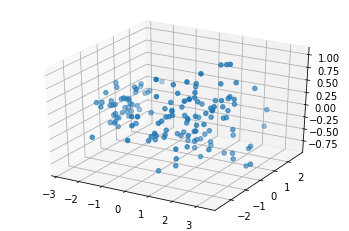

In [63]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_pc['first_component'], df_pc['second_component'], df_pc['third_component'])
plt.show()

## 寄与率（explained variance）

In [89]:
pca = PCA(n_components=4)
pca.fit(X)

# 寄与率
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [72]:
# 累積寄与率
np.cumsum(pca.explained_variance_ratio_)

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

Text(0, 0.5, 'cumulative explained variance')

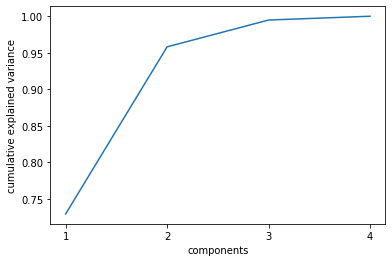

In [85]:
n_components = 4
plt.plot(range(1, n_components+1), np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(1, n_components+1))
plt.xlabel('components')
plt.ylabel('cumulative explained variance')

Text(0, 0.5, 'cumulative explained variance')

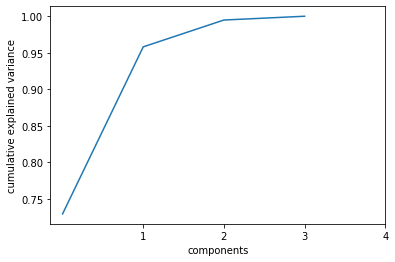

In [91]:
n_components = 4
plt.plot(range(0, 4),np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(1, n_components+1))
plt.xlabel('components')
plt.ylabel('cumulative explained variance')